In [136]:
import numpy as np
import matplotlib.pyplot as plt

n = 50               # Size of velocity field
num_particles = 1  # Number of particles
num_steps = 1000     # Number of time steps
dt = 0.01            # Time step size
velocity_field = np.empty((n, n), dtype=tuple)
velocity_field .fill((1, 0))

# Initialize positions randomly within a domain
particle_positions = np.random.rand(num_particles, 2)*(n-1)

# Initialize velocities as zeros
particle_velocities = np.zeros((num_particles, 2))

def get_fluid_velocity(pos, velfield):
    # Implement your fluid velocity calculation here
    # This function should return a 2D velocity vector based on the given position
    # The velocity field should be given as a mxm matrix of tuple entries representing the x and y velocities at that point.
    #if we don't do land on discrete points we estimate our velocity by looking at the nearest points. 
    #get decimal part of position
    if pos[0] % 1 or pos[1] % 1: 
        xdecimal = pos[0] % 1
        xint = int(pos[0])
        ydecimal = pos[1] % 1
        yint = int(pos[1])
        if xint<n-1 and yint<n-1:
            xvel = velfield[xint][yint][0]*(1-xdecimal)*(1-ydecimal) + velfield[xint+1][yint][0]*(xdecimal)*(1-ydecimal) + velfield[xint+1][yint+1][0]*(xdecimal)*(ydecimal) + velfield[xint][yint+1][0]*(ydecimal)*(1-xdecimal)
            yvel = velfield[xint][yint][1]*(1-xdecimal)*(1-ydecimal) + velfield[xint+1][yint][1]*(xdecimal)*(1-ydecimal) + velfield[xint+1][yint+1][1]*(xdecimal)*(ydecimal) + velfield[xint][yint+1][1]*(ydecimal)*(1-xdecimal)   
        else:
            xvel, yvel = 0, 0
    else:
        xvel, yvel = velfield[pos[0]][pos[1]][0], velfield[pos[0]][pos[1]][1]

    return (xvel, yvel) 

for step in range(num_steps):
    # Update particle positions
    particle_positions += particle_velocities * dt

    # Update particle velocities based on fluid velocity
    for i in range(num_particles):
        particle_velocities[i] = get_fluid_velocity(particle_positions[i], velocity_field)


array([32.66207707])

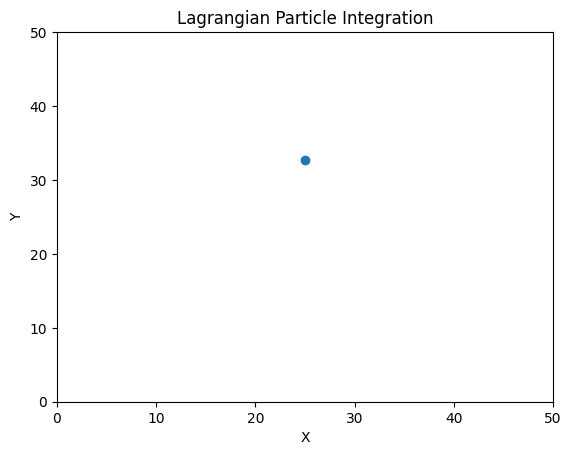

In [137]:
plt.xlim(0, n)    
plt.ylim(0, n)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Lagrangian Particle Integration')
plt.scatter(particle_positions[:, 0], particle_positions[:, 1])
particle_positions[:, 0]
particle_positions[:, 1]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

n = 50               # Size of velocity field
num_particles = 1  # Number of particles
num_steps = 1000     # Number of time steps
dt = 0.01            # Time step size

# Initialize positions randomly within a domain
particle_positions = np.random.rand(num_particles, 2)*(n-1)

# Initialize velocities as zeros
particle_velocities = np.zeros((num_particles, 2))

def get_fluid_velocity(pos, velfieldU, velfieldV, x, y):
    # Implement your fluid velocity calculation here
    # This function should return a 2D velocity vector based on the given position
    # The velocity field should be given as a mxm matrix of tuple entries representing the x and y velocities at that point.
    #if we don't do land on discrete points we estimate our velocity by looking at the nearest points. 
    #get decimal part of position
    #x,y need to be 1D numpy arrays and then the code works. x will refer to all x coordinates and y to all y coordinates
    interp_u = CubicSpline(x, y, velfieldU)
    interp_v = CubicSpline(x, y, velfieldV)
    xvel = interp_u(pos[0], pos[1])
    yvel = interp_v(pos[0], pos[1])

    return (xvel, yvel) 

for step in range(num_steps):
    # Update particle positions
    particle_positions += particle_velocities * dt

    # Update particle velocities based on fluid velocity
    for i in range(num_particles):
        particle_velocities[i] = get_fluid_velocity(particle_positions[i], velocity_field_U, velocity_field_V, x, y)


In [ ]:
"""Exact Lagrangian integrator"""



import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

n = 50               # Size of velocity field
num_particles = 1    # Number of particles
num_steps = 1000     # Number of time steps
dt = 0.01            # Time step size
L = 2000             # Length of square

# Initialize positions randomly within a domain
particle_positions = np.random.rand(num_particles, 2)*(n-1)
# Add 0 concentration (for now) to all the particles
zeros_row = np.zeros((1, particle_positions.shape[1]))
particle_positions = np.vstack((particle_positions, zeros_row))

# Initialize velocities as zeros
particle_velocities = np.zeros((num_particles, 3))

def get_fluid_velocity(pos, velfield):


    interp_u = CubicSpline(x, y, velfieldU)
    interp_v = CubicSpline(x, y, velfieldV)
    xvel = interp_u(pos[0], pos[1])
    yvel = interp_v(pos[0], pos[1])
    conc = 0 #placeholder

    return (xvel, yvel, conc) 

for step in range(num_steps):
    # Update particle positions
    particle_positions == (particle_positions + particle_velocities * dt) % L

    # Update particle velocities based on fluid velocity
    for i in range(num_particles):
        particle_velocities[i] = get_fluid_velocity(particle_positions[i], velfield)


In [ ]:
import numpy as np

def integrate_particle(position, velocity_field, dt, num_steps):
    """
    Integrates a Lagrangian particle using Euler's method.
    
    Parameters:
        position (numpy.ndarray): Initial position of the particle.
        velocity_field (function): Time-dependent velocity field function that takes position and time as arguments.
        dt (float): Time step size.
        num_steps (int): Number of integration steps to perform.
    
    Returns:
        numpy.ndarray: Array of particle positions over time.
    """
    positions = np.zeros((num_steps+1, len(position)))  # Array to store particle positions
    
    # Set initial position
    positions[0] = position
    
    # Perform integration steps
    for i in range(num_steps):
        time = i * dt  # Current time
        velocity = velocity_field(positions[i], time)  # Get velocity at current position and time
        
        # Update position using Euler's method
        position = position + velocity * dt
        
        # Store updated position
        positions[i+1] = position
    
    return positions

# Example velocity field: Rossby waves
def velocity_field(position, time):
    x, y, z = position
    
    # Example parameters for Rossby waves
    A = 1.0  # Amplitude
    k = 0.5  # Wave number
    omega = 1.0  # Angular frequency
    
    # Compute velocity components based on Rossby waves
    u = -A * np.sin(k * x) * np.cos(omega * time)
    v = A * np.cos(k * x) * np.sin(omega * time)
    w = 0.0
    
    return np.array([u, v, w])

# Parameters
initial_position = np.array([0.0, 0.0, 0.0])  # Initial position of the particle
dt = 0.01  # Time step size
num_steps = 1000  # Number of integration steps

# Integrate the particle
particle_positions = integrate_particle(initial_position, velocity_field, dt, num_steps)

# Print the resulting positions
print(particle_positions)


In [140]:
import numpy as np
from scipy.interpolate import RegularGridInterpolator

def integrate_particles(positions, concentrations, velocity_field, dt, num_steps):
    """
    Integrates Lagrangian particles with concentrations using the unfreezing method.
    
    Parameters:
        positions (numpy.ndarray): Initial positions of the particles. Shape: (num_particles, 3).
        concentrations (numpy.ndarray): Initial concentrations of the particles. Shape: (num_particles,).
        velocity_field (function): Time-dependent velocity field function that takes position and time as arguments.
        dt (float): Time step size.
        num_steps (int): Number of integration steps to perform.
    
    Returns:
        Tuple[numpy.ndarray, numpy.ndarray]: Arrays of particle positions and concentrations over time.
    """
    num_particles = len(positions)
    positions_over_time = np.zeros((num_steps+1, num_particles, 2))  # Array to store particle positions
    concentrations_over_time = np.zeros((num_steps+1, num_particles))  # Array to store particle concentrations
    
    # Set initial positions and concentrations
    positions_over_time[0] = positions
    concentrations_over_time[0] = concentrations
    
    # Perform integration steps
    for i in range(num_steps):
        time = i * dt  # Current time
        
        # Freeze the velocity field at current time
        frozen_velocity_field = lambda pos: velocity_field(pos, time)
        
        # Interpolate the velocity field for particle positions
        velocities = interpolate_velocities(positions_over_time[i], frozen_velocity_field)
        
        # Update positions using Euler's method
        positions = positions_over_time[i] + velocities * dt
        
        # Update concentrations using the concentration equation
        divergences = compute_divergences(positions_over_time[i], frozen_velocity_field)
        concentrations = concentrations_over_time[i] - concentrations_over_time[i] * divergences * dt
        
        # Store updated positions and concentrations
        positions_over_time[i+1] = positions
        concentrations_over_time[i+1] = concentrations
    
    return positions_over_time, concentrations_over_time

def interpolate_velocities(positions, velocity_field):
    """
    Interpolates the velocities at given positions using the velocity field.
    
    Parameters:
        positions (numpy.ndarray): Positions of the particles. Shape: (num_particles, 3).
        velocity_field (function): Time-dependent velocity field function.
    
    Returns:
        numpy.ndarray: Interpolated velocities at the given positions. Shape: (num_particles, 3).
    """
    num_particles = len(positions)
    velocities = np.zeros((num_particles, 3))
    
    for i in range(num_particles):
        position = positions[i]
        velocity = interpolate_velocity(position, velocity_field)
        velocities[i] = velocity
    
    return velocities

def interpolate_velocity(position, velocity_field):
    """
    Interpolates the velocity at a given position using the velocity field.
    
    Parameters:
        position (numpy.ndarray): Position of the particle.
        velocity_field (function): Time-dependent velocity field function.
    
    Returns:
        numpy.ndarray: Interpolated velocity at the given position.
    """
    # Define the coordinate arrays for the velocity field
    x_coords = np.linspace(0, 1, 10)  # Example x coordinates
    y_coords = np.linspace(0, 1, 10)  # Example y coordinates
    
    # Create meshgrid for the coordinate arrays
    x_mesh, y_mesh = np.meshgrid(x_coords, y_coords, indexing='ij')
    
    # Get the velocity field values at the meshgrid points
    velocity_field_values = velocity_field((x_mesh, y_mesh))
    
    # Create an interpolator for the velocity field
    interpolator = RegularGridInterpolator((x_coords, y_coords), velocity_field_values)
    
    # Interpolate the velocity at the given position
    velocity = interpolator(position)
    
    return velocity

def compute_divergences(positions, velocity_field):
    """
    Computes the divergences of the velocity field at given positions.
    
    Parameters:
        positions (numpy.ndarray): Positions of the particles. Shape: (num_particles, 3).
        velocity_field (function): Time-dependent velocity field function.
    
    Returns:
        numpy.ndarray: Divergences of the velocity field at the given positions. Shape: (num_particles,).
    """
    num_particles = len(positions)
    divergences = np.zeros(num_particles)
    
    for i in range(num_particles):
        position = positions[i]
        velocity = velocity_field(position)
        divergence = np.sum(np.gradient(velocity))
        divergences[i] = divergence
    
    return divergences

# Example velocity field: Rossby waves
def velocity_field(position, time):
    x, y = position
    
    # Example parameters for Rossby waves
    A = 1.0  # Amplitude
    k = 0.5  # Wave number
    omega = 1.0  # Angular frequency
    
    # Compute velocity components based on Rossby waves
    u = -A * np.sin(k * x) * np.cos(omega * time)
    v = A * np.cos(k * x) * np.sin(omega * time)
    
    return np.array([u, v])

# Parameters
initial_positions = np.array([[0.0, 0.0], [1.0, 1.0]])  # Initial positions of the particles
initial_concentrations = np.array([1.0, 1.0])  # Initial concentrations of the particles
dt = 0.01  # Time step size
num_steps = 1000  # Number of integration steps

# Integrate the particles with concentrations
particle_positions, particle_concentrations = integrate_particles(
    initial_positions, initial_concentrations, velocity_field, dt, num_steps
)

# Print the resulting positions and concentrations
print("Particle Positions:")
print(particle_positions)
print("\nParticle Concentrations:")
print(particle_concentrations)


ValueError: There are 10 points and 2 values in dimension 0

In [ ]:
import numpy as np
from scipy.interpolate import RegularGridInterpolator

def integrate_particles(positions, concentrations, k, l, A, omega, phi dt, num_steps):
    """
    Integrates Lagrangian particles with concentrations using the unfreezing method.
    
    Parameters:
        positions (numpy.ndarray): Initial positions of the particles. Shape: (num_particles, 3).
        concentrations (numpy.ndarray): Initial concentrations of the particles. Shape: (num_particles,).
        velocity_field (function): Time-dependent velocity field function that takes position and time as arguments.
        dt (float): Time step size.
        num_steps (int): Number of integration steps to perform.
    
    Returns:
        Tuple[numpy.ndarray, numpy.ndarray]: Arrays of particle positions and concentrations over time.
    """
    num_particles = len(positions)
    positions_over_time = np.zeros((num_steps+1, num_particles, 2))  # Array to store particle positions
    concentrations_over_time = np.zeros((num_steps+1, num_particles))  # Array to store particle concentrations
    
    # Set initial positions and concentrations
    positions_over_time[0] = positions
    concentrations_over_time[0] = concentrations
    
    # Perform integration steps
    for i in range(num_steps):
        time = i * dt  # Current time
        
        velocities = np.real(analytical_velocity(positions_over_time[i], k, l, A, omega, phi, i)) #returns velocity of all particles at time
        
        # Update positions using Euler's method
        positions = positions_over_time[i] + velocities * dt
        
        # Update concentrations using the concentration equation
        divergences = np.real(compute_divergences(positions_over_time[i], velocities, k, l)) #change frozen to k,l
        concentrations = concentrations_over_time[i] - concentrations_over_time[i] * divergences * dt
        
        # Store updated positions and concentrations
        positions_over_time[i+1] = positions
        concentrations_over_time[i+1] = concentrations
    
    return positions_over_time, concentrations_over_time

def analytical_velocity(positions, k, l, A, omega, phi, time):
    """
    Interpolates the velocities at given positions using the velocity field.
    
    Parameters:
        positions (numpy.ndarray): Positions of the particles. Shape: (num_particles, 3).
        velocity_field (function): Time-dependent velocity field function.
    
    Returns:
        numpy.ndarray: Interpolated velocities at the given positions. Shape: (num_particles, 3).
    """

    #generate a 2d array with the x and y velocities respectively for an individual point
    def velocity_at_point(x, y, t):
        streamfunction = A * np.exp(1j(k*x + l*y - omega*t + phi))
        u = -1 * streamfunction * 1j * k #dphi/dx should be 0 if phase is random? worth checking
        v = streamfunction * 1j * l
        return np.array((u, v))

    num_particles = len(positions)
    velocities = np.zeros((num_particles, 2))
    
    for i in range(num_particles):
        position = positions[time][i] # Gives the position of the particle at current time as a 2D array
        velocity = velocity_at_point(position[0], position[1], time) # Gives the x and y axis velocities at the desired time
        velocities[i] = velocity
    
    return velocities

def compute_divergences(positions, velocities, k, l):
    """Returns the divergence value for each particle"""
    divergences = 1j * k * velocities[0] + 1j * l * velocities[1]
    
    return divergences



In [ ]:
import numpy as np
from scipy.interpolate import RegularGridInterpolator
from scipy.integrate import solve_ivp

#We expect a velocity field such that velocity_field[i] gives the matrix at time i

def integrate_particles(positions, concentrations, velocity_field, num_steps, dt):
    """
    Integrates Lagrangian particles with concentrations using the unfreezing method.
    
    Parameters:
        positions (numpy.ndarray): Initial positions of the particles. Shape: (num_particles, 2).
        concentrations (numpy.ndarray): Initial concentrations of the particles. Shape: (num_particles,).
        velocity_field (function): Time-dependent velocity field function that takes position and time as arguments.
        dt (float): Time step size.
        num_steps (int): Number of integration steps to perform.
    
    Returns:
        Tuple[numpy.ndarray, numpy.ndarray]: Arrays of particle positions and concentrations over time.
    """
    #num_steps = np.shape(velocity_field)[0] - 1 
    num_particles = len(positions)
    positions_over_time = np.zeros((num_steps+1, num_particles, 2))  # Array to store particle positions
    concentrations_over_time = np.zeros((num_steps+1, num_particles))  # Array to store particle concentrations
    
    # Set initial positions and concentrations
    positions_over_time[0] = positions
    concentrations_over_time[0] = concentrations
    
    #use a polynomial to approximate -note that we must ignore phi for this
    #once we have a polynomial we just use solve ivp

    #1 get u and v matrices using finite differences and gradient
    #2 interpolate for both u and v using a cubic (later might compare cubic to quartic and quadratic)
    #3 solve ivp for u and v cubics (should work even if it is 2D, must check)
    #4 deal with concentration. 
    # Probably get matrix of change of concentration at all time points (-cdiv(u,v))
    # actually simpler get div(u,v) in terms of the polynomials for u and v, p(x,y,t) and q(x,y,t) respectively
    # therefore get dc/dt = -c*(dp(x,y,t)/dx + dq(x,y,t)/dy). This can then be solved by ivp (but might be different time steps to position hmm)
    # maybe force the time steps to be the same in both cases
    # record the concentration and position values.

    u, v = get_matrix_u(velocity_field), get_matrix_v(velocity_field)
    polynomial_u, polynomial_v = interpolate(u), interpolate(v) 
    t_span = (0, num_steps * dt)
    t_eval = [i * dt for i in range(num_steps+1)] #should go from 0 to t_span
    positions # should be of form numberofparticles * 2
    y0 = [ [positions[i][0], positions[i][1]] for i in range(num_particles)]
    #y0_list = [
    #    [1, 0],  # Particle 1 initial position [x1, y1]
    #    [2, 0],  # Particle 2 initial position [x2, y2]
    #    [3, 0]   # Particle 3 initial position [x3, y3]
    #]

    # work out trajectory of each particle or can do all at once in vector form?
    sol = solve_ivp(fun, t_span, y0, t_eval = t_eval)
    positions = sol.y.T

    for i in range(num_steps):
        positions_over_time[i+1] = positions[i+1]

    #concentration
    y0conc = [ [concentrations][i], positions[i][0], positions[i][1] for i in range(num_particles)] #returns conc and then pos
    solconc = solve_ivp(funconc, t_span, y0, t_eval = t_eval)

    return positions_over_time, concentrations_over_time


def get_matrix_u(velocity_field):
    umatrix = velocity_field
    nt, nx, ny = velocity_field.shape
    for i in range(nt):
        umatrix[i] = np.gradient(velocity_field[i], axis=1) * -1
    return umatrix

def get_matrix_v(velocity_field):
    vmatrix = velocity_field
    nt, nx, ny = velocity_field.shape
    for i in range(nt):
        vmatrix[i] = np.gradient(velocity_field[i], axis=0) 
    return vmatrix

def interpolate(umatrix):
    t_vals = np.arange(umatrix.shape[0])
    x_vals = np.arange(umatrix.shape[1])
    y_vals = np.arange(umatrix.shape[2])
    T, X, Y = np.meshgrid(t_vals, x_vals, y_vals, indexing='ij')
    points = np.column_stack([T.ravel(), X.ravel(), Y.ravel()])
    values = umatrix.ravel()
    interpolator = RegularGridInterpolator((t_vals, x_vals, y_vals), values, method='cubic')
    return interpolator

def fun(t, y):
    #note that here y refers to both x and y coords
    coords = np.array([t, y[0], y[1]])
    dxdt = polynomial_u(coords)
    dydt = polynomial_v(coords)
    return [dxdt, dydt]

def funconc(t, y):
    y
    
    dcdt = -y[0] * (deriv_poly_u(coords) + deriv_poly_v(coords))


    return [dcdt, 0, 0]






In [180]:
num_steps = 2
num_particles = 7
np.zeros((num_steps+1, num_particles, 2))[0]
np.zeros((7,2))[0]
positions = [0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1]
[ [positions[i][0], positions[i][1]] for i in range(num_particles)]

[[0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1]]